# **Cross-Validation Techniques**

[Cross-Validation: Evaluating Estimator Performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

[sklearn.model_selection: Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

It is a resampling procedure used to evaluate machine learning models and access how the model will perform for an independent test dataset.

**Why Cross Validation is Important?**

We often randomly split the dataset into train data and test data to develop a machine learning model. The training data is used to train the ML model, and the same model is tested on independent testing data to evaluate the performance of the model.

With the change in the random state of the split, the accuracy of the model also changes, so we are not able to achieve a fixed accuracy for the model. The testing data should be kept independent of the training data so that no data leakage occurs. During the development of an ML model using the training data, the model performance needs to be evaluated. Here’s the importance of cross-validation data comes into the picture.

**Data needs to split into:**

*   **Training Data:** Used for model development.
*   **Validation Data:** Used for validating the performance of the same model.

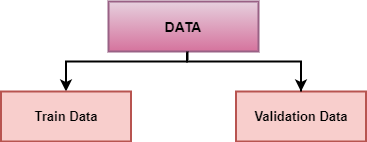

In simple terms, cross-validation allows utilizing the data even better.

In [21]:
# Import Library.
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('diabetes.csv')  # Load Dataset.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.info() # Dataset Summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
# Split the dataset into features and target value.
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Feature Scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **HoldOut Validation Approach - Train and Test Split.**

The holdout technique is an exhaustive cross-validation method that randomly splits the dataset into train and test data depending on data analysis.

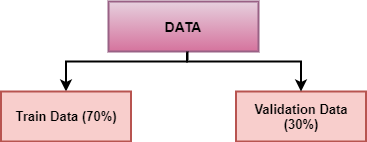

In the case of holdout cross-validation, the dataset is randomly split into training and validation data. Generally, the split of training data is more than test data. The training data is used to induce the model, and the validation data evaluates the performance of the model. The more data is used to train the model, the better the model is. For the holdout cross-validation method, a good amount of data is isolated from training.

*   Holdout Cross-Validation is not suitable for an imbalanced dataset.
*   A lot of data is isolated from training the model.

In [25]:
# Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.7662337662337663


# **K-Fold Cross Validation**

[sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

In $K$-fold cross-validation, the original dataset is equally partitioned into $K$ subparts or folds. Out of the $K$-folds or groups, for each iteration, one group is selected as validation data, and the remaining $(K-1)$ groups are selected as training data.

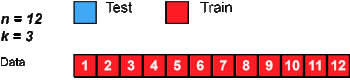

The process is repeated for $K$ times until each group is treated as validation and remaining as the training data.

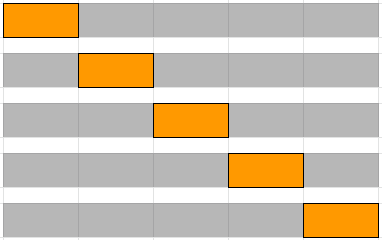

The final accuracy of the model is computed by taking the mean accuracy of the $K$-models validation data. That is, $acc_{CV} = \sum_{i=1}^{K}\frac{acc_{i}}{K}$



*   The model has low bias and low time complexity.
*   The entire dataset is utilized for both training and validation.
*   It is not suitable for an imbalanced dataset.


In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
kfold_val = KFold(10)
results = cross_val_score(model, X_train, y_train, cv = kfold_val)
print(results)
print(np.mean(results))

[0.74193548 0.58064516 0.59677419 0.79032258 0.6557377  0.6557377
 0.68852459 0.67213115 0.6557377  0.75409836]
0.6791644632469593


# **Stratified K-fold Cross Validation**

[sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

For all the cross-validation techniques discussed above, they may not work well with an imbalanced dataset. Stratified $K$-fold cross-validation solved the problem of an imbalanced dataset.

In Stratified $K$-fold cross-validation, the dataset is partitioned into $K$ groups or folds such that the validation data has an equal number of instances of the target class label. This ensures that one particular class is not over-present in the validation or train data especially when the dataset is imbalanced.

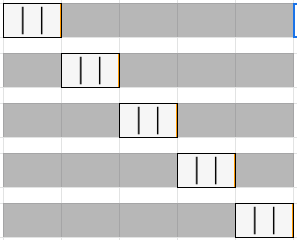

In Stratified $K$-fold cross-validation, each fold has equal instances of the target class. The final score is computed by taking the mean of scores of each fold.

*   Works well for an imbalanced dataset.




In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
skfold = StratifiedKFold(n_splits = 10)
results = cross_val_score(model, X_train, y_train, cv = skfold)
print(results)
print(np.mean(results))

[0.75806452 0.64516129 0.62903226 0.72580645 0.70491803 0.73770492
 0.68852459 0.73770492 0.7704918  0.72131148]
0.711872025383395


# **Leave-P-Out Cross Validation (LpOCV)**

[sklearn.model_selection.LeavePOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePOut.html)

Leave-P-Out cross-validation (LpOCV) is an exhaustive cross-validation technique, that involves using $p$-observation as validation data, and the remaining data is used to train the model. This is repeated in all ways to cut the original sample on a validation set of $p$ observations and a training set.

In [28]:
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
lpoCV = LeavePOut(2)
results = cross_val_score(model, X_train, y_train, cv = lpoCV)
print(results)
print(np.mean(results))

[1.  0.5 1.  ... 1.  1.  1. ]
0.6977007402054296


# **Leave-One-Out Cross Validation (LOOCV)**

[sklearn.model_selection.LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut)

Leave-One-Out cross-validation (LOOCV) is an exhaustive cross-validation technique. It is a category of LpOCV with the case of $p=1$.

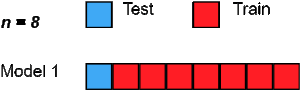

For a dataset having $n$ rows, the $1^{st}$ row is selected for validation, and the rest $(n-1)$ rows are used to train the model. For the next iteration, the $2^{nd}$ row is selected for validation and the rest to train the model. Similarly, the process is repeated until $n$ steps or the desired number of operations.

Both the above two cross-validation techniques (i.e. LpOCV and LOOCV) are the types of exhaustive cross-validation. Exhaustive cross-validation methods are cross-validation methods that learn and test in all possible ways.

*   Simple, easy to understand, and implement.
*   The model may lead to a low bias.
*   The computation time required is high.

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()
looCV = LeaveOneOut()
results = cross_val_score(model, X_train, y_train, cv = looCV)
print(results)
print(np.mean(results))

[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.